In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the unprocessed dataset. This will let us discover DataType errors and raw dataset characteristics.

In [89]:
df = pd.read_csv("../data/raw/faang_stock_prices.csv")

In [90]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             14964 non-null  str    
 1   Ticker           14964 non-null  str    
 2   Open             14964 non-null  float64
 3   High             14964 non-null  float64
 4   Low              14964 non-null  float64
 5   Close            14964 non-null  float64
 6   Volume           14964 non-null  int64  
 7   SMA_7            14964 non-null  float64
 8   SMA_21           14964 non-null  float64
 9   EMA_12           14964 non-null  float64
 10  EMA_26           14964 non-null  float64
 11  RSI_14           14964 non-null  float64
 12  MACD             14964 non-null  float64
 13  MACD_Signal      14964 non-null  float64
 14  Bollinger_Upper  14964 non-null  float64
 15  Bollinger_Lower  14964 non-null  float64
 16  Daily_Return     14964 non-null  float64
 17  Volatility_7d    14964 

Date field is not datetype. Changing it to a valid data type:

In [91]:
df['Date'] = pd.to_datetime(df['Date'])

In [92]:
df.describe()

,Date,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
count,14964,14964.000000,14964.000000,14964.000000,14964.000000,1.496400e+04,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000
mean,2021-02-03 05:47:00.529270,147.969959,149.643762,146.256716,147.999839,1.186247e+08,147.631588,146.746646,147.314335,146.428158,55.686976,0.886176,0.888239,156.048174,137.572513,0.001335,0.018537,148.126287
min,2016-02-23 00:00:00,0.762756,0.777392,0.746413,0.767738,4.726100e+06,0.710800,0.683503,0.704268,0.691066,3.180003,-33.155902,-30.727270,0.780719,0.569458,-0.263901,0.001171,0.767738
25%,2018-08-13 00:00:00,50.094322,50.468777,49.669161,50.083026,2.428050e+07,49.906533,49.334041,49.600781,49.146090,43.754097,-0.331123,-0.283075,51.982837,47.077112,-0.008375,0.010449,50.149251
50%,2021-02-03 12:00:00,123.841343,125.102966,122.262753,123.922924,4.432600e+07,123.301276,122.667958,123.067546,122.222704,56.381405,0.507975,0.491224,131.496224,114.337861,0.001286,0.015466,124.013718
75%,2023-07-28 00:00:00,189.299623,191.429458,186.986899,189.079613,1.057329e+08,188.811102,187.325549,187.740894,186.739774,67.819077,2.160937,2.068120,199.721259,176.264492,0.011626,0.022748,189.254452
max,2026-01-22 00:00:00,789.972167,795.064526,779.657506,788.823792,3.692928e+09,775.982954,762.484980,766.193137,757.613109,100.000000,29.441884,26.790650,813.954233,734.580075,0.298067,0.120255,788.823792
std,NaN,132.599874,134.001750,131.065146,132.547711,1.889461e+08,132.261571,131.557653,131.956650,131.170115,16.597436,4.177106,3.932864,139.825874,123.751294,0.022069,0.012431,132.632577


First day of the dataset (each 5 companies first closed day)

In [93]:
df.head(5)

,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239


Understanding whole time progression:

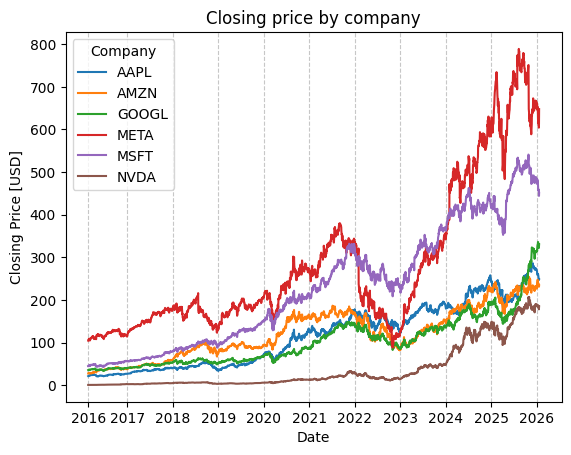

In [94]:
plt.figure()
sns.lineplot(data=df, x='Date', y='Close', hue='Ticker')
unique_years = sorted(df['Date'].dt.year.unique())
tick_positions = [df[df['Date'].dt.year == year]['Date'].min() for year in unique_years]
tick_labels = [str(year) for year in unique_years]

plt.xticks(ticks=tick_positions, labels=tick_labels)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Closing price by company')
plt.xlabel('Date')
plt.ylabel('Closing Price [USD]')
plt.legend(title='Company', bbox_to_anchor=(0, 1), loc='upper left')
plt.show()

Lets set a fixed date and "zoom" on the graph

In [95]:
df_zoomed = df.loc[
    (df['Date'] > '2022-10-01') & 
    (df['Date'] < '2022-12-01')]

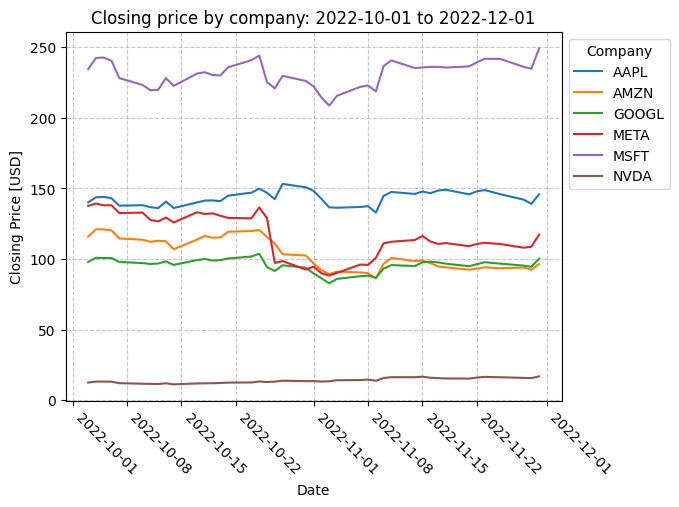

In [96]:
plt.figure()
sns.lineplot(data=df_zoomed, x='Date', y='Close', hue='Ticker')

plt.grid(linestyle='--', alpha=0.7)
plt.title('Closing price by company: 2022-10-01 to 2022-12-01')
plt.xlabel('Date')
plt.ylabel('Closing Price [USD]')
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=315, ha='left')
plt.show()

META stock for that timeline (detailed view with candles and computed stats):

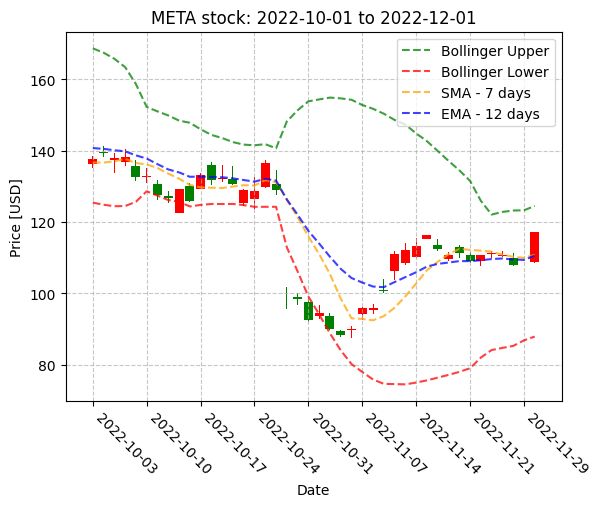

In [97]:
plt.figure()

meta = df_zoomed.loc[(df_zoomed['Ticker'] == 'META')]
up = meta.loc[(meta['Close']) >= (meta['Open'])]
down = meta.loc[(meta['Close']) < (meta['Open'])]

col1 = 'red'
col2 = 'green'
width = 5
width2 = 0.5

plt.bar(up.index, up['Close'] - up['Open'], width, bottom=up['Open'], color=col1)
plt.bar(up.index, up['High'] - up['Close'], width2, bottom=up['Close'], color=col1)
plt.bar(up.index, up['Low'] - up['Open'], width2, bottom=up['Open'], color=col1)

plt.bar(down.index, down['Close'] - down['Open'], width, bottom=down['Open'], color=col2)
plt.bar(down.index, down['High'] - down['Open'], width2, bottom=down['Open'], color=col2)
plt.bar(down.index, down['Low'] - down['Close'], width2, bottom=down['Close'], color=col2)

plt.plot(meta.index, meta['Bollinger_Upper'], color='green', linestyle='--', label='Bollinger Upper', alpha=0.75)
plt.plot(meta.index, meta['Bollinger_Lower'], color='red', linestyle='--', label='Bollinger Lower', alpha=0.75)
plt.plot(meta.index, meta['SMA_7'], color='orange', linestyle='--', label='SMA - 7 days', alpha=0.75)
plt.plot(meta.index, meta['EMA_12'], color='blue', linestyle='--', label='EMA - 12 days', alpha=0.75)


plt.grid(linestyle='--', alpha=0.7)
plt.title('META stock: 2022-10-01 to 2022-12-01')
plt.xlabel('Date')
plt.ylabel('Price [USD]')
plt.legend(loc='upper right')

step = 5
ticks_indices = meta.index[::step]
ticks_labels = pd.to_datetime(meta['Date']).dt.strftime('%Y-%m-%d').iloc[::step]
plt.xticks(
    ticks=ticks_indices, 
    labels=ticks_labels, 
    rotation=-45, 
    ha='left'
)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()